In [1]:
from rbibm.plots.main_plots import plot_adversarial_posterior_predictive, plot_adversarial_posterior
from rbibm.utils.utils_data import load_posterior_samples_by_id, get_model_by_id, get_adversarial_examples_by_id, query, get_model_by_idx, query_main, remove_entry_by_id
from rbibm.plots.metric_plots import plot_rob_tolerance_plot, plot_expected_coverage
from rbibm.plots.multi_plots import multi_plot


from rbibm.plots.styles import use_style
from rbibm.tasks import HHTask
import torch

import matplotlib.pyplot as plt

In [2]:
task = ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "vae_task", "spatial_sir"]
figsize_col=2.
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

In [3]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

{'model_name': 'maf_ensemble', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'gaussian_linear'}
{'model_name': 'maf_ensemble', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'lotka_volterra'}
{'model_name': 'maf_ensemble', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'vae_task'}
{'model_name': 'maf_ensemble', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'hudgkin_huxley'}
{'model_name': 'maf_ensemble', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'sir'}
{'model_name': 'maf_ensemble', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'spatial

/mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


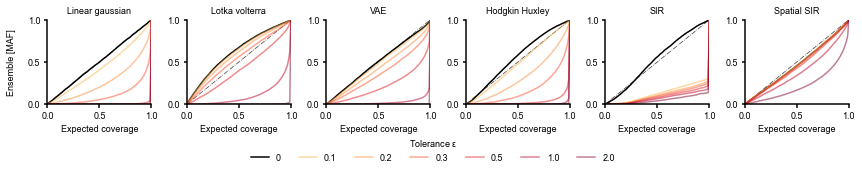

In [4]:


with use_style("pyloric"):
    fig, axes = multi_plot("benchmark", "task", "attack", plot_expected_coverage, model_name="maf_ensemble", figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov,
                            with_eps=True, hue="eps", N_train=100000, verbose=False, attack="L2PGDAttack",with_grid=False, legend_bbox_to_anchor=[0.5,-0.2])
    legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
    axes[0,0].minorticks_off()
    axes[0,0].set_ylabel("Ensemble [MAF]")
    plt.show()
    fig.savefig(f"appendix_expected_coverages_maf_ensemble.svg")


{'model_name': 'maf', 'defense': 'L2UniformNoiseTraining', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'gaussian_linear'}
{'model_name': 'maf', 'defense': 'L2UniformNoiseTraining', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'lotka_volterra'}
{'model_name': 'maf', 'defense': 'L2UniformNoiseTraining', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'vae_task'}
{'model_name': 'maf', 'defense': 'L2UniformNoiseTraining', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'hudgkin_huxley'}
{'model_name': 'maf', 'defense': 'L2UniformNoiseTraining', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'attack': 'L2PGDAttack', 'with_grid': False, 'task': 'sir'}
{'model_name': 'maf',

/mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


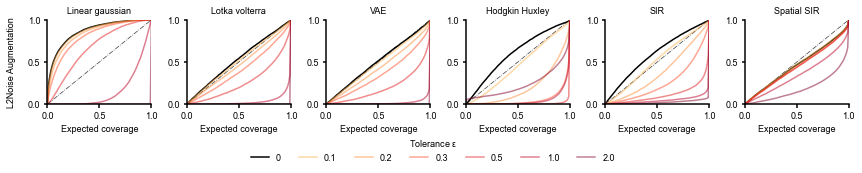

In [5]:


with use_style("pyloric"):
    fig, axes = multi_plot("benchmark", "task", "attack", plot_expected_coverage, model_name="maf", defense="L2UniformNoiseTraining", figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov,
                            with_eps=True, hue="eps", N_train=100000, verbose=False, attack="L2PGDAttack",with_grid=False, legend_bbox_to_anchor=[0.5,-0.2])
    legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
    axes[0,0].minorticks_off()
    axes[0,0].set_ylabel("L2Noise Augmentation")
    plt.show()
    fig.savefig(f"appendix_expected_coverages_maf_noise_reg.svg")


In [6]:
idxs_final =[]
name = "benchmark"
id1 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.001, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=100., N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

id1 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.1, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.1, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])
id1 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=0.1, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="spatial_sir")

ids_noise = query_main(name, defense="L2UniformNoiseTraining", N_train=100000, model_name="maf")
ids_ensemble = query_main(name, defense="None", N_train=100000, model_name="maf_ensemble")
idxs_final.extend(ids_noise.id.tolist())
idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])
idxs_final.extend(ids_ensemble.id.tolist())


In [7]:
ids_noise.id.tolist()

['10ac9f80-a663-46d2-aff7-c604c4aff6c4',
 '4ee18acc-3d69-4a11-8f9a-ed5bc1ae12b6',
 '9c911422-e359-4a42-b579-37f12c13d4d5',
 'd8369762-ecda-42d7-b0b8-16772674a73f',
 'f1e9c657-da9a-49b5-b089-e4c4fda33925',
 '860acbbc-f5c4-4e8d-b858-f364f453c8db']

In [8]:
color_map_defenses = {"None": "C7", "FIMTraceRegularizer": "#8856a7", "L2PGDTargetedAdversarialTraining": "#df65b0", "L2PGDrKLTrades": "#2ca25f", "L2UniformNoiseTraining": "C5"}

{'verbose': False, 'hue': 'defense', 'id': ['fe0c9cc5-5980-4463-a0ec-205ea98ba38c', '7a814a1d-bf19-4ca9-946e-41261843aa9a', 'fe720725-58d6-4f50-b246-9cd356943848', 'cd7d6372-694b-4d0e-8f13-9c7d966db0e3', 'd033fae7-cceb-44ee-896b-bc9f0dd52196', 'c2261acf-f5e2-464c-908d-dcee5f2b198a', 'dec9a9f0-032a-4a30-bfd9-606efea35bc5', '25f8ee70-7900-4b48-9ddc-9695d65db27d', '8a6d3856-9265-4b5f-ab4e-e168959735c7', '3f55fb3d-865f-4ef3-96c7-cf7c93c6b3f8', '145e1feb-dfa6-43d6-945c-78a39a1e086b', 'e829bf0b-8dd2-4963-aefc-34cd2bc0ff77', '10ac9f80-a663-46d2-aff7-c604c4aff6c4', '4ee18acc-3d69-4a11-8f9a-ed5bc1ae12b6', '9c911422-e359-4a42-b579-37f12c13d4d5', 'd8369762-ecda-42d7-b0b8-16772674a73f', 'f1e9c657-da9a-49b5-b089-e4c4fda33925', '860acbbc-f5c4-4e8d-b858-f364f453c8db', '0ff1ecc4-5b6d-43c8-8b31-6d746b4bbb12', '79e9310f-84c8-4c8d-83b9-2cbb0004e76b', '192e8052-e029-410c-9637-d266ad00c99a', '5f7a562f-fc25-4041-8571-062e7f5ff713', '49314e22-9e94-426f-b67e-02688a858b3b', '3020b76b-cbaa-449c-8a23-c445705c6d5

/mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


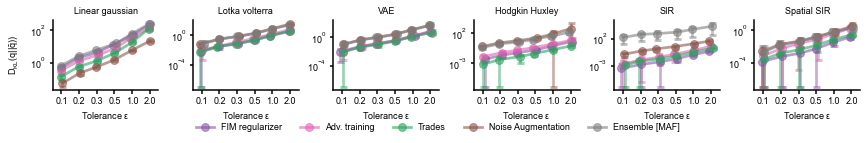

In [9]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "attack", plot_rob_tolerance_plot, 
                           figsize_per_col=figsize_col, 
                           figsize_per_row=figsize_row_rob, verbose=False, hue="defense",id=idxs_final, legend=False,attack="L2PGDAttack", jitter=True,
                                                                                                         expand_params_defense=True, metric_rob="ReverseKLRobMetric", color_map=color_map_defenses, alpha=0.6)   
    axes[0,0].set_ylabel("$D_{KL}(q||\\tilde{q}))$")  
    labels = ["FIM regularizer", "Adv. training", "Trades", "Noise Augmentation", "Ensemble [MAF]"]
    for i in range(5):
        fig.legends[0].texts[i]._text = labels[i]

    fig.savefig("appendix_additional_defense_plot_rob_rKL.svg")
    plt.show()

{'task': 'gaussian_linear', 'id': ['fe0c9cc5-5980-4463-a0ec-205ea98ba38c', '7a814a1d-bf19-4ca9-946e-41261843aa9a', 'fe720725-58d6-4f50-b246-9cd356943848', 'cd7d6372-694b-4d0e-8f13-9c7d966db0e3', 'd033fae7-cceb-44ee-896b-bc9f0dd52196', 'c2261acf-f5e2-464c-908d-dcee5f2b198a', 'dec9a9f0-032a-4a30-bfd9-606efea35bc5', '25f8ee70-7900-4b48-9ddc-9695d65db27d', '8a6d3856-9265-4b5f-ab4e-e168959735c7', '3f55fb3d-865f-4ef3-96c7-cf7c93c6b3f8', '145e1feb-dfa6-43d6-945c-78a39a1e086b', 'e829bf0b-8dd2-4963-aefc-34cd2bc0ff77', '10ac9f80-a663-46d2-aff7-c604c4aff6c4', '4ee18acc-3d69-4a11-8f9a-ed5bc1ae12b6', '9c911422-e359-4a42-b579-37f12c13d4d5', 'd8369762-ecda-42d7-b0b8-16772674a73f', 'f1e9c657-da9a-49b5-b089-e4c4fda33925', '860acbbc-f5c4-4e8d-b858-f364f453c8db', '0ff1ecc4-5b6d-43c8-8b31-6d746b4bbb12', '79e9310f-84c8-4c8d-83b9-2cbb0004e76b', '192e8052-e029-410c-9637-d266ad00c99a', '5f7a562f-fc25-4041-8571-062e7f5ff713', '49314e22-9e94-426f-b67e-02688a858b3b', '3020b76b-cbaa-449c-8a23-c445705c6d57', '4f25

/mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


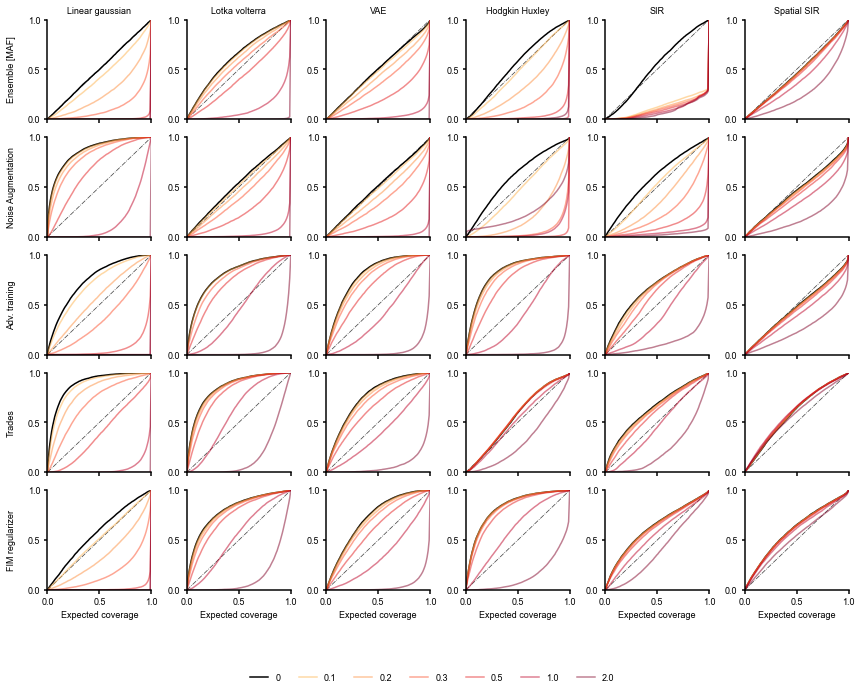

In [11]:
with use_style("pyloric"):
    fig, axes = multi_plot("benchmark", "task", "defense", plot_expected_coverage,
    figsize_per_col=figsize_col, figsize_per_row=figsize_row_expected_cov-0.25, task=task, id=idxs_final,  color_map=color_map_eps,  with_eps=True, hue="eps", with_grid=False, verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
    axes[0,0].set_ylabel("Ensemble [MAF]")
    axes[1,0].set_ylabel("Noise Augmentation")
    fig.savefig("appendix_additional_defense_plot_coverages_rKL.svg")
    plt.show()

Following data row is used:
Id: 1a6b4b47-61b0-412a-8717-89d2162abdac, Task: vae_task, Model: maf_ensemble, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =88f1747f-c6f8-4aae-8ecf-2c80ee4ed57b, Attack:L2PGDAttack,Attack loss_fn:ForwardKLLoss, Metric: ForwardKLRobMetric 


(<Figure size 1000x1000 with 9 Axes>,
 array([[<AxesSubplot:xlabel='dim 0'>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>]],
       dtype=object))

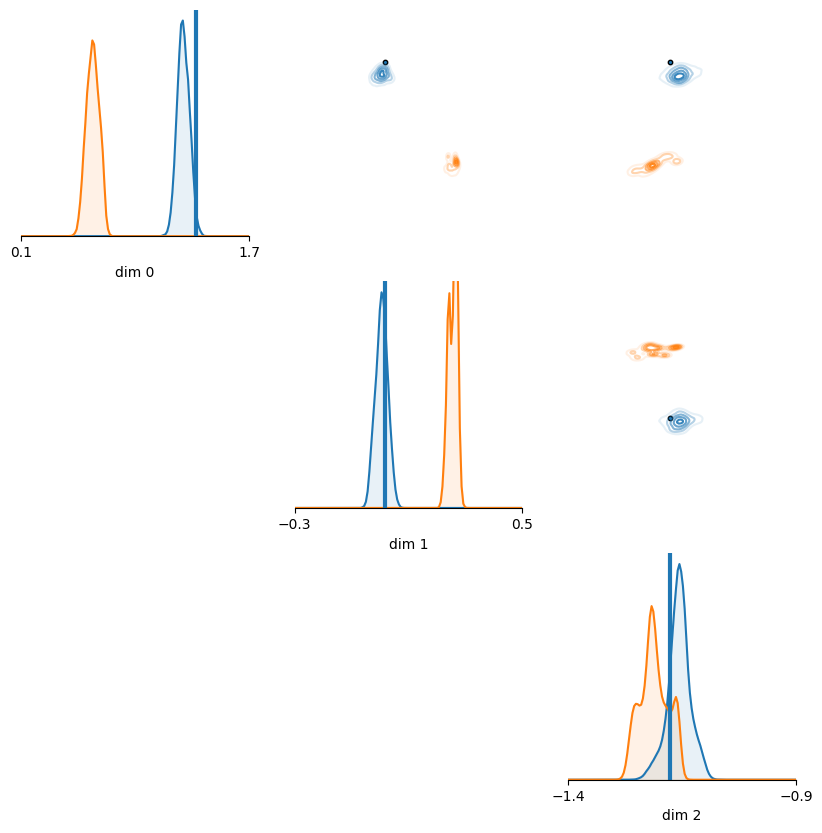

In [43]:
plot_adversarial_posterior("benchmark", task="vae_task", model_name="maf_ensemble", eps=2., attack="L2PGDAttack")

Following data row is used:
Id: 1a6b4b47-61b0-412a-8717-89d2162abdac, Task: vae_task, Model: maf_ensemble, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =88f1747f-c6f8-4aae-8ecf-2c80ee4ed57b, Attack:L2PGDAttack,Attack loss_fn:ForwardKLLoss, Metric: ForwardKLRobMetric 


(<Figure size 1000x500 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Observation'}>,
         <AxesSubplot:title={'center':'Posterior predictive'}>],
        [<AxesSubplot:title={'center':'Adversarial example'}>,
         <AxesSubplot:title={'center':'Adversarial posterior predictive'}>]],
       dtype=object))

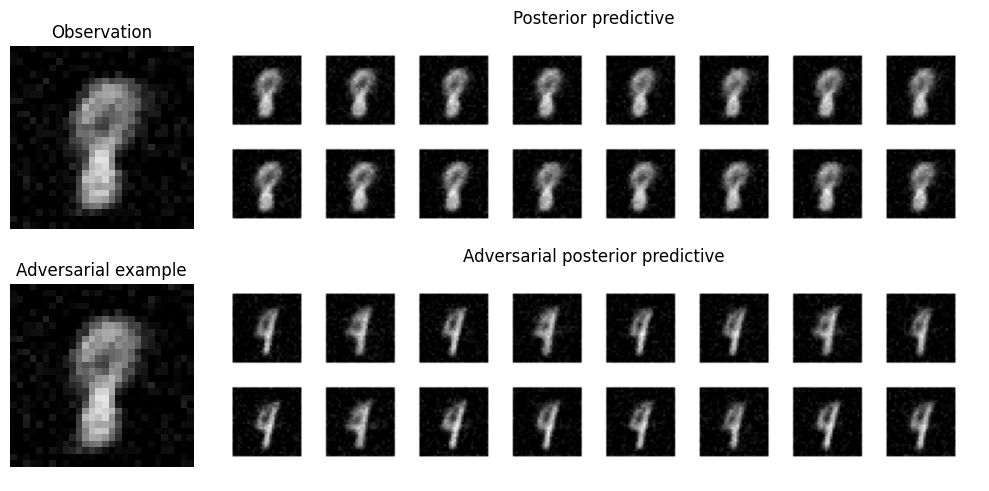

In [53]:
plot_adversarial_posterior_predictive("benchmark", task="vae_task", model_name="maf_ensemble", eps=2., idx_adv_example=20, attack="L2PGDAttack")